In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pickle
import os
from mutation import *
from crossover import *
from rmp import *
from mfea import *
from task import *
from llm import *
import matplotlib.pyplot as plt

In [8]:
gnbg_tasks = []
gnbg_tasks.append(GNBGTask(1))
gnbg_tasks.append(GNBGTask(2))

In [9]:
tasks = []
tasks.append(CEC17Task(4))
tasks.append(CEC17Task(5))
tasks.append(CEC17Task(6))
tasks.append(CEC17Task(7))

In [5]:
num_indis_per_task = 200
indi_len = 50
bound = 100
crossover = BLXCrossover()
mutation = PolynomialMutation(10, bound)
rmp = NormalRMP()

amfea = AMFEA(num_indis_per_task, indi_len, bound, tasks, crossover, mutation, rmp)

Initialization:
Task 0:
Best Fitness: 53746.66225654427
Mean Fitness: 279053.05830319226

Task 1:
Best Fitness: 1549.0623838992014
Mean Fitness: 2111.9706952109354

Task 2:
Best Fitness: 786.9305124059376
Mean Fitness: 881.8036134034977

Task 3:
Best Fitness: 5633.904168292786
Mean Fitness: 8246.371030008382



In [32]:
bfs, mfs = amfea.fit(5000, monitor=True, monitor_rate=1000)

Gen 0
Task 0:
Best Fitness: 500.86785888671875
Mean Fitness: 500.8827854003906
Task 1:
Best Fitness: 700.4812622070312
Mean Fitness: 700.4812622070312
Task 2:
Best Fitness: 602.5093383789062
Mean Fitness: 602.5223759765624
Task 3:
Best Fitness: 832.6752319335938
Mean Fitness: 833.8208674316406
Time taken: 0.00 seconds

Gen 1000
Task 0:
Best Fitness: 500.744384765625
Mean Fitness: 500.75530114746095
Task 1:
Best Fitness: 700.4812622070312
Mean Fitness: 700.4812622070312
Task 2:
Best Fitness: 602.460693359375
Mean Fitness: 602.4707153320312
Task 3:
Best Fitness: 831.8670043945312
Mean Fitness: 831.8841499023438
Time taken: 0.00 seconds

Gen 2000
Task 0:
Best Fitness: 500.6350402832031
Mean Fitness: 500.6510122070313
Task 1:
Best Fitness: 700.4812622070312
Mean Fitness: 700.4812622070312
Task 2:
Best Fitness: 602.4392700195312
Mean Fitness: 602.4488681640624
Task 3:
Best Fitness: 831.8346557617188
Mean Fitness: 831.835185546875
Time taken: 0.00 seconds

Gen 3000
Task 0:
Best Fitness: 500.

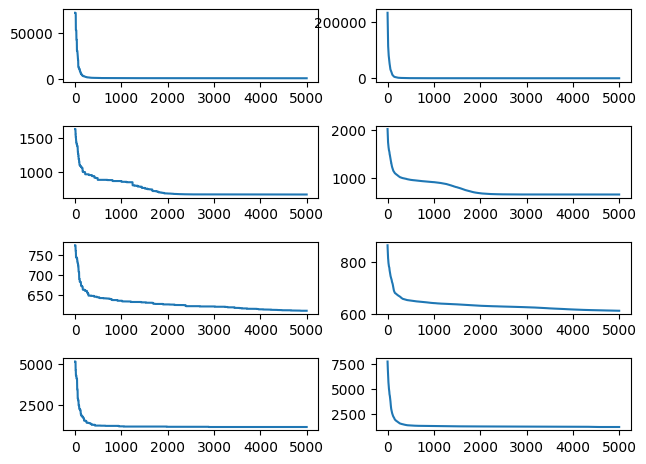

In [27]:
num_tasks = len(tasks)
fig, axes = plt.subplots(num_tasks, 2)
fig.tight_layout()
for i in range(num_tasks):
    axes[i][0].plot(bfs[i])
    axes[i][1].plot(mfs[i])

In [9]:
DEEPSEEK_API_KEY = os.getenv("DEEPSEEK_API_KEY")

In [15]:
model = DeepsekModel2(DEEPSEEK_API_KEY)

In [11]:
ideas1 = model.init_idea_from_llm()
ideas2 = model.init_idea_from_llm()

In [12]:
ideas1

['Ensure the probability values are normalized to sum to 1 across all tasks.',
 'Incorporate task similarity metrics to bias mating probabilities toward more related tasks.',
 'Allow for dynamic adjustment of probabilities based on evolutionary progress or task performance.',
 'Include a randomization factor to maintain exploration and avoid premature convergence.']

In [13]:
ideas2

['Ensure the probability distribution encourages exploration of diverse task combinations while maintaining a balance between exploitation of promising pairs.',
 'Incorporate dynamic adaptation to reflect the evolving fitness landscape and inter-task relationships during optimization.',
 'Design the function to be computationally efficient to avoid bottlenecks in the overall MFEA workflow.',
 'Maintain a stochastic element to prevent premature convergence and preserve population diversity across tasks.']

In [ ]:
new_ideas = model.reflect(ideas1, ideas2, 0.5, 0.3)

1. Normalize probabilities to sum to 1 while dynamically weighting tasks based on their current fitness improvement rates.  
2. Use adaptive task similarity metrics that evolve with the population’s diversity to prioritize mating between related tasks.  
3. Introduce a decaying randomization factor to balance exploration early and exploitation later in the evolution.  
4. Adjust probabilities based on real-time feedback from crossover success rates to favor high-performing task pairs.
